## Analysing Dissatisfaction Amongst Different Employees


# Introduction:
We will be working with two datasets, one from the Department of Education,Training and Employment(DETE) and the other from the Technical and Further Education(TAFE) institute in Queensland, Australia.
The goal of the analysis is to answer certain questions on the reasons why workers are resigning,whether it is due to some disatisfaction, etc. We will also try to figure out the reason those who have worked for a short period are resigning and the reason for those who have worked for longer. We will aslo figure out if younger employees are resigning because of a particular type of disatisfaction and we will do the same for the older employees. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')

In [3]:
tafe_survey = pd.read_csv('tafe_survey.csv')

# DETE Exploration

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
dete_survey['Business Unit'].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Infrastructure                                  2
Policy, Research, Legislation                   2
Finance                                         1
Calliope State School                           1
Pacific Pines SHS                               1
Indigenous Education and Training Futures       1
Corporate Procurement                           1
Name: Business Unit, dtype: int64

In [9]:
dete_survey['Classification'].value_counts(dropna=False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

There are a lof of missing values in the Aboriginal and disabliity column but that is to be expected as they are probably minorities whichh means a lot of people who took the survey are neither disabled or Aboriginal. There are also columns in our dataframe tha contains `'Not Stated'` which are mssing values that are not represented as `NaN`. We are going to read the datset again and pass in an argument to read 'Not Stated' as `NaN`. The columns not needed for the analysis are going to be dropped.

# TAFE Exploration

In [10]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [11]:
tafe_survey.tail()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2
701,6.350730e+17,Tropical North Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,-,Career Move - Self-employment,-,-,...,Yes,Yes,Yes,Yes,Female,26 30,Contract/casual,Administration (AO),3-4,1-2


In [12]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [13]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [14]:
tafe_survey['Contributing Factors. Career Move - Public Sector '].value_counts(dropna=False)

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

The data set above contains a number of missing values in several columns. Columns that aren't needed for the analysis are going to be dropped.

# Rereading Dataset & Dropping Unwanted Columns.

In [15]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [16]:
dete_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [18]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

The columns that have been dropped from both of the datasets are not necessary for the analysis needed to be done, and having them dropped will also make it easier to combine both datasets.

# Cleaning Data

In [19]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [20]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.lower().str.strip()

In [21]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [22]:
new_column_names = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [23]:
tafe_survey_updated.rename(new_column_names, axis=1, inplace=True)

In [24]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Some changes have been made in the names of the columns in both dataframes. This is helpful in preventing erros or missing values when  we cobine the two dataframes together.

# Filtering The Data

In [25]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [26]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [27]:
#selects values that contains the string resignation
dete_resignations = dete_survey_updated[
    dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [28]:
tafe_resignations = tafe_survey_updated[
    tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [29]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [30]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Because we are concerned with the people who left due to some sort of dissatisfaction, both dataframes have been filtered to contain only response from those who resigned.

# Verifying The Data

In [31]:
dete_resignations['cease_date'].value_counts().sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

In [32]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

In [33]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [34]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [35]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

Unlike the tafe_resignations dataset, the dete_resignations dataset doesn't have any column that tells us how many years an employee has worked before resignation. So a new column was created for it and we got the values from subtracting the values in the `'dete_start_date'` column from those in the `'cease_date'` column.

# Updating Values

In [36]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [37]:
#modifies the values in our dataframe to return True, False or Nan
def update_vals(val): 
    NaN = pd.isnull(val)
    if NaN:
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
    

In [38]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [39]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print( tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
                

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [40]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [41]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department', 'physical_work_environment',
'lack_of_recognition', 'lack_of_job_security',
'work_location','employment_conditions',
'work_life_balance', 'workload']].any(axis=1, skipna=False)

In [43]:
dete_resignations['dissatisfied'].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

In [44]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Creating a new dissatisfaction column makes it easier to identify the employees who were dissatisfied and those who weren't.

# Combining Dataframes

In [45]:
#creates a new institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [46]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [47]:
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
combined.notnull().sum()

id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    3

In [49]:
#drops columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1,thresh=500).copy()

In [50]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


Both dataframes have been combined into one so they can both be easily analysed. The columns with less than 500 non-null values have also been dropped for this analysis.

# Cleaning the `'institute_service'` Column

In [51]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [52]:
#converts the column to an str dtype
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [53]:
#extract strings that match with figures[0-9]
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')

In [54]:
#converts column to a float dtype
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [55]:
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [56]:
#assigns a category to a specific range of service years
def category(val):
    NaN = pd.isnull(val)
    if NaN:
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <= 6:
        return 'Experienced'
    elif val > 6 and val <= 10:
        return 'Established'
    elif val > 10:
        return 'Veteran'

In [57]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(category)

In [58]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

To make it easier to analyse the type of employees that are dissatisfied, we group the employees into either of New, Experienced, Established and Veteran. Employees with less than 3 years are classed as New, w

# Analysing Dissatisfied Column

In [59]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Since false is the most common result in the dissatisfied column, the missing data in the coolumn will be replaced with false values

In [60]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# Dissatisfaction by Employee Experience

In [61]:
###calculates the percentage of dissatisfied employees since a True value =1 and False=0
dis_pvt =combined_updated.pivot_table(index='service_cat', values='dissatisfied' )

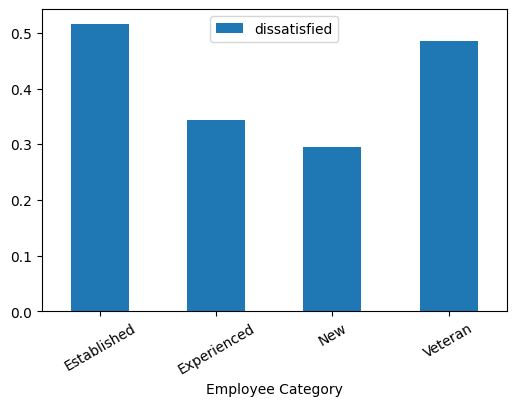

In [62]:
%matplotlib inline
dis_pvt.plot(kind='bar', rot=30)
plt.xlabel('Employee Category')
plt.show()

From the chart above, it shows that establised and veteran employees are more likely to resign due to some kind of dissatisfaction than the new and experienced ones.

# Cleaning Age Column

In [63]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [64]:
#converts the column to an str dtype
combined_updated['age'] = combined_updated['age'].astype(str)

In [65]:
#extract strings that match with figures[0-9]
combined_updated['age'] = combined_updated['age'].str.extract(r'(\d+)')

In [66]:
#converts column to a float dtype
combined_updated['age'] = combined_updated['age'].astype(float)

In [67]:
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [68]:
#assigns a category to a specific range of age
def age_category(val):
    NaN = pd.isnull(val)
    if NaN:
        return np.nan
    elif val < 30:
        return 'Twenties'
    elif val >= 30 and val < 40:
        return 'Thirties'
    elif val >= 40 and val < 50:
        return 'Forties'
    elif val >= 50 and val < 60:
        return 'Fifties'
    else:
        return 'Sixties'

In [69]:
combined_updated['age_cat'] = combined_updated['age'].apply(age_category)

In [70]:
combined_updated['age_cat'].value_counts(dropna=False)

Forties     174
Twenties    139
Thirties    134
Fifties     126
NaN          55
Sixties      23
Name: age_cat, dtype: int64

The ages have been classified into categories to make it easier to understand what age group of people are dissatisfied.

# Dissatisfaction by Age

In [71]:
#gets the percentage of dissatisfied employees for a particular age group
dis_age_pvt = combined_updated.pivot_table(index='age_cat', 
                                    values='dissatisfied')

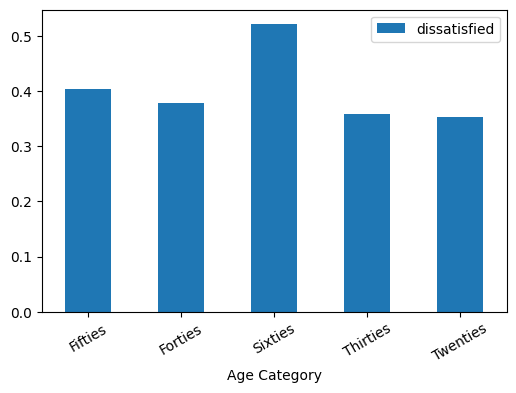

In [72]:
dis_age_pvt.plot(kind='bar', rot=30)
plt.xlabel('Age Category')
plt.show()

From the chart above, we can deduce that employees in their 60's were more likely to leave due to some kind of dissatisfaction than others in other age range.

# Dissatisfaction by Institute

In [73]:
combined_updated['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [74]:
institute_pvt = combined_updated.pivot_table(index='institute', 
                                values='dissatisfied')

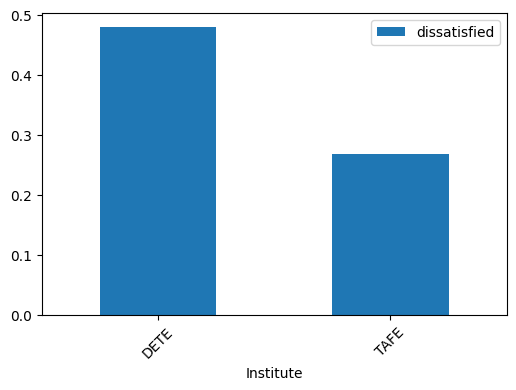

In [75]:
institute_pvt.plot(kind='bar', rot=45)
plt.xlabel('Institute')
plt.show()

# Conclusion:
At the start of our analysis, we wanted to find out what type of employees were resigning due to some sort of dissatisfaction. After analysing our data, we found out the following:
* Employees who have worked at both institutes for more than 7 years(established - veterans) were more likely to resign because of a dissatisfaction.
* Employees in their Sixties were also more likely to resign due to some satisfaction than employees in other age groups.
* There  were more resignations due to dissatisfaction in the DETE institute than there was in the TAFE institute.